# **Pré-processamento de Dados**

# **Limpeza**

Dataset: Pima Indians Diabetes Database

URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
import pandas as pd

dataset_original = pd.read_csv('diabetes.csv', sep =',')

print('Banco com %d amostras e %d colunas' % dataset_original.shape)

print("Colunas: ", ' '.join(dataset_original.columns))

for col in dataset_original.columns:
  print("Primeiras 3 linhas da coluna %s:" % col)
#[0:5, col] 
#[:, col] 
#[:-5,col] 
#[0,:] 
print(dataset_original.loc[0:3,col])
print("\nTabela sumarizando as colunas do banco")
dataset_original.describe()

Banco com 768 amostras e 9 colunas
Colunas:  Pregnancies Glucose BloodPressure SkinThickness Insulin BMI DiabetesPedigreeFunction Age Outcome
Primeiras 3 linhas da coluna Pregnancies:
Primeiras 3 linhas da coluna Glucose:
Primeiras 3 linhas da coluna BloodPressure:
Primeiras 3 linhas da coluna SkinThickness:
Primeiras 3 linhas da coluna Insulin:
Primeiras 3 linhas da coluna BMI:
Primeiras 3 linhas da coluna DiabetesPedigreeFunction:
Primeiras 3 linhas da coluna Age:
Primeiras 3 linhas da coluna Outcome:
0    1
1    0
2    1
3    0
Name: Outcome, dtype: int64

Tabela sumarizando as colunas do banco


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
import numpy as np

for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
  dataset_original[col] = dataset_original[col].replace(0,np.nan)

In [ ]:
dataset_original.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
dataset_removido = dataset_original.dropna() # Linhas com NaN vão ser removidas

dataset_imputado = pd.DataFrame(dataset_original) 
for col in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
  media = dataset_imputado[col].mean()
  dataset_imputado[col] = dataset_imputado[col].fillna(media)
  print('substituindo valores faltando na coluna %s por %f' % (col, media))

print('\nDataset com imputação: %d amostras e %d colunas' % dataset_imputado.shape)
print('Dataset com remoção: %d amostras e %d colunas' % dataset_removido.shape)

substituindo valores faltando na coluna Glucose por 121.686763
substituindo valores faltando na coluna BloodPressure por 72.405184
substituindo valores faltando na coluna SkinThickness por 29.153420
substituindo valores faltando na coluna Insulin por 155.548223
substituindo valores faltando na coluna BMI por 32.457464

Dataset com imputação: 768 amostras e 9 colunas
Dataset com remoção: 392 amostras e 9 colunas


# **Remoção de Outliers**

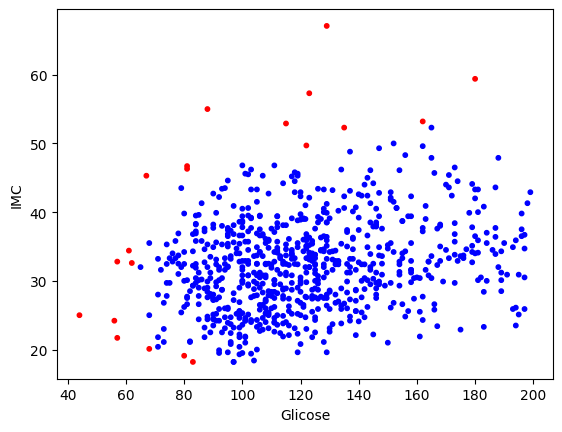

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import numpy as np

lof = LocalOutlierFactor( n_neighbors=30, contamination = "auto")

X = dataset_imputado.loc[:,['Glucose','BMI']]
cluster_predito = lof.fit_predict(X)

colors = np.asarray(['red', 'blue'])

plt.scatter(X.Glucose, X.BMI, s=10, color=colors[(cluster_predito +1) // 2])
plt.xlabel('Glicose')
plt.ylabel('IMC')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


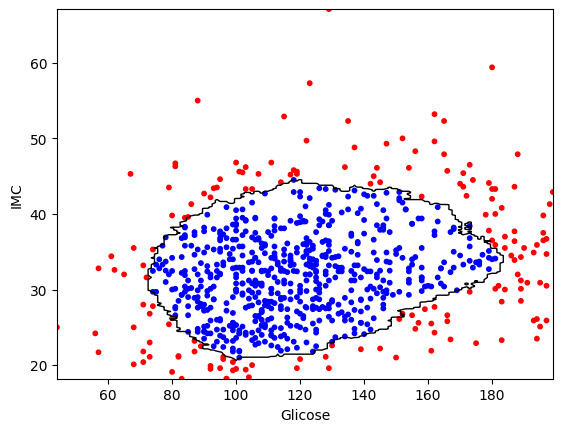

In [ ]:
def plot_decision_countour(x1, x2, algo):
  xx, yy = np.meshgrid(sorted(x1),sorted(x2))
  Z = algo.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, levels=[0], linewidths=1, colors='black')

from sklearn.ensemble import IsolationForest

colors = np.asarray(['red', 'blue'])

iso = IsolationForest(contamination = "auto")
cluster_predito = iso.fit(X).predict(X)

plot_decision_countour(X.Glucose, X.BMI, iso)

plt.scatter(X.Glucose, X.BMI, s=10, color=colors[(cluster_predito +1) // 2])
plt.xlabel('Glicose')
plt.ylabel('IMC')
plt.show()

In [ ]:
cluster_predito = lof.fit_predict(X)

dataset_imputado_sem_outliers = pd.DataFrame(dataset_imputado.loc[cluster_predito == 1,:])

In [ ]:
print('Dataset com remoção: %d amostras e %d colunas' % dataset_removido.shape)
print('Dataset com imputação: %d amostras e %d colunas' % dataset_imputado.shape)
print('Dataset com imputação + remoção de outliers: %d amostras e %d colunas' % dataset_imputado_sem_outliers.shape)

Dataset com remoção: 392 amostras e 9 colunas
Dataset com imputação: 768 amostras e 9 colunas
Dataset com imputação + remoção de outliers: 748 amostras e 9 colunas


# **Balanceamento**

In [ ]:
count = np.unique(dataset_imputado_sem_outliers.Outcome, return_counts = True)
print('Distribuição da classe sem under sampling %d %d' % (count[1][0], count[1][1]))

from imblearn.under_sampling import RandomUnderSampler
X = dataset_imputado_sem_outliers.loc[:, dataset_imputado_sem_outliers.columns != 'Outcome']
y = dataset_imputado_sem_outliers.Outcome

rus = RandomUnderSampler()
Xr, yr = rus.fit_resample(X,y)
count_under = np.unique(yr, return_counts = True)
print('Distribuição da classe sem under sampling %d %d' % (count_under[1][0], count_under[1][1]))

Distribuição da classe sem under sampling 487 261
Distribuição da classe sem under sampling 261 261
